## Import all relevant libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

## Load and clean-up data one last time before training

In [3]:
homepath = r"D:\\Viraj_Work\\MISC\\Data"
os.chdir(homepath)

Final_Data = pd.read_csv('FINAL_PBP_DATA.csv', keep_default_na=False, low_memory=False) #read all the data as list
qtrs = [1,2,3,4]
downs = ['1','2','3','4']
Final_Data = Final_Data[Final_Data['qtr'].isin(qtrs) & Final_Data['down'].isin(downs)]
Final_Data = Final_Data[Final_Data['score_differential'] != 'NA']

Final_Data['down'] = Final_Data['down'].astype(int)
Final_Data['score_differential'] = Final_Data['score_differential'].astype(float)
Final_Data['play_clock'] = Final_Data['play_clock'].astype(float)

play_dict = {'pass': 1, 'run': 0}
Final_Data['play_type'] = Final_Data['play_type'].map(play_dict)

## Separate inpendent/response variables and train/test sets

In [4]:
X_Full = Final_Data[['qtr', 'down', 'ydstogo', 'shotgun', 'no_huddle',
       'posteam_timeouts_remaining', 'score_differential', 'play_clock',
       'yards_to_goal', 'cum_pass_comp%', 'cum_pass_yards', 'cum_run_yards',
       'teamQB_dual_threat_rating']]
y_Full = Final_Data[['play_type']]

print("Following is the information on our dataset\n")
print(X_Full.info())

X_train, X_test,y_train, y_test = train_test_split(X_Full, y_Full, test_size=0.2, random_state=42)

Following is the information on our dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333821 entries, 0 to 336966
Data columns (total 13 columns):
qtr                           333821 non-null int64
down                          333821 non-null int32
ydstogo                       333821 non-null int64
shotgun                       333821 non-null int64
no_huddle                     333821 non-null int64
posteam_timeouts_remaining    333821 non-null int64
score_differential            333821 non-null float64
play_clock                    333821 non-null float64
yards_to_goal                 333821 non-null int64
cum_pass_comp%                333821 non-null float64
cum_pass_yards                333821 non-null int64
cum_run_yards                 333821 non-null int64
teamQB_dual_threat_rating     333821 non-null float64
dtypes: float64(4), int32(1), int64(8)
memory usage: 34.4 MB
None


## K - Nearest Neighbors

In [9]:
clf1 = KNeighborsClassifier()
gs = sklearn.model_selection.GridSearchCV(clf1, param_grid={'n_neighbors': range(40, 50)}, cv = 5, verbose=3)
gs_results = gs.fit(X_train,y_train.values.ravel())
best_n = gs_results.best_params_['n_neighbors']
print('Best value for n_neighbors is {}'.format(best_n))
clf1 = KNeighborsClassifier(n_neighbors=best_n)
clf1.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=40 ..................................................
[CV] ............. n_neighbors=40, score=0.643975136673, total=  11.0s
[CV] n_neighbors=40 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.7s remaining:    0.0s


[CV] ............. n_neighbors=40, score=0.644967423051, total=  10.9s
[CV] n_neighbors=40 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV] ............. n_neighbors=40, score=0.641709728151, total=  12.2s
[CV] n_neighbors=40 ..................................................
[CV] ............. n_neighbors=40, score=0.644354989702, total=  15.1s
[CV] n_neighbors=40 ..................................................
[CV] ............. n_neighbors=40, score=0.646133682831, total=  11.2s
[CV] n_neighbors=41 ..................................................
[CV] ............. n_neighbors=41, score=0.645566539354, total=  17.1s
[CV] n_neighbors=41 ..................................................
[CV] ............. n_neighbors=41, score=0.645135924511, total=  13.0s
[CV] n_neighbors=41 ..................................................
[CV] ............. n_neighbors=41, score=0.643244963679, total=   7.9s
[CV] n_neighbors=41 ..................................................
[CV] ............. n_neighbors=41, score=0.645497097922, total=   7.4s
[CV] n_neighbors=41 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 52.1min finished


Best value for n_neighbors is 49


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='uniform')


Training data set score is 0.672461955545

Best n-neighbors value is 39

Test data set score is 0.645697596046

Classification Report

             precision    recall  f1-score   support

          0       0.61      0.44      0.51     27890
          1       0.66      0.80      0.72     38875

avg / total       0.64      0.65      0.63     66765

Confusion Matrix



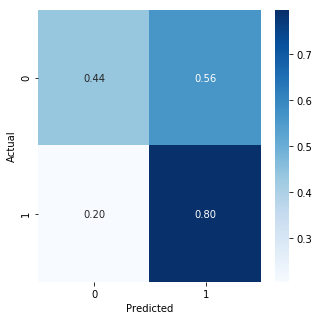

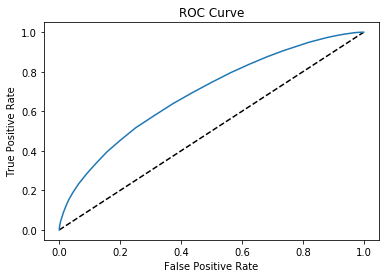

In [6]:
## Training Score
print('\nTraining data set score is {}\n'.format(accuracy_score(clf1.predict(X_train),y_train)))

## Hyperparameter and test score
print("Best n-neighbors value is {}\n".format(best_n))
print('Test data set score is {}\n'.format(accuracy_score(clf1.predict(X_test),y_test)))

## Classification report
print('Classification Report\n')
print(classification_report(y_test,clf1.predict(X_test)))

## Confustion matrix
print('Confusion Matrix\n')
#labels = ['run', 'pass']
confmat = confusion_matrix(y_test, clf1.predict(X_test))
confmat_n = confmat.astype('float')/confmat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confmat_n, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.axhspan
plt.savefig('Conf_mat_KNN.png')

## ROC Curve
y_pred_prob = clf1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve');
plt.savefig('ROC_KNN.png')

## ROC Area

## Logistic Regression

In [7]:
clf2 = LogisticRegression(solver='liblinear')
gs = sklearn.model_selection.GridSearchCV(clf2, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, cv = 5)
gs.fit(X_train,y_train.values.ravel())
clf2 = LogisticRegression(C=gs.best_params_['C'], solver='liblinear')
clf2.fit(X_train,y_train.values.ravel())

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Weight coefficients are as follows

                             Weights
qtr                        -0.123501
down                        0.554158
ydstogo                     0.089554
shotgun                     1.468002
no_huddle                  -0.009586
posteam_timeouts_remaining -0.152588
score_differential         -0.024096
play_clock                 -0.009307
yards_to_goal               0.001771
cum_pass_comp%              0.551482
cum_pass_yards              0.002881
cum_run_yards              -0.007682
teamQB_dual_threat_rating  -0.451370

Training data set score is 0.71711176682

Best C parameter is 100

Test data set score is 0.72025762001

Classification Report

             precision    recall  f1-score   support

          0       0.66      0.67      0.67     27890
          1       0.76      0.76      0.76     38875

avg / total       0.72      0.72      0.72     66765

Confusion Matrix



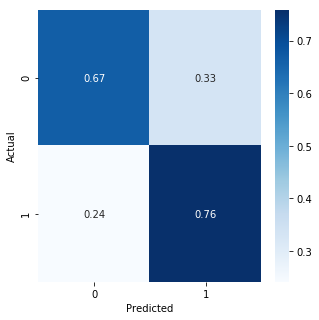

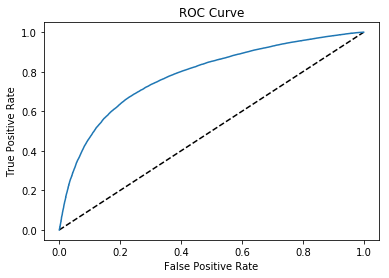

In [8]:
## Print Log Reg weights
print('Weight coefficients are as follows\n')
weights = pd.DataFrame(clf2.coef_.T, index = X_Full.columns, columns = ['Weights'])
print(weights)

## Training Score
print('\nTraining data set score is {}\n'.format(accuracy_score(clf2.predict(X_train),y_train)))

## Hyperparameter and test score
print("Best C parameter is {}\n".format(gs.best_params_['C']))
print('Test data set score is {}\n'.format(accuracy_score(clf2.predict(X_test),y_test)))

## Classification report
print('Classification Report\n')
print(classification_report(y_test,clf2.predict(X_test)))

## Confustion matrix
print('Confusion Matrix\n')
#labels = ['run', 'pass']
confmat = confusion_matrix(y_test, clf2.predict(X_test))
confmat_n = confmat.astype('float')/confmat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confmat_n, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.axhspan
plt.savefig('Conf_mat_LogReg.png')

## ROC Curve
y_pred_prob = clf2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve');
plt.savefig('ROC_LogReg.png')

## ROC Area

## Decision Trees

In [9]:
clf3 = DecisionTreeClassifier()
param_grid = {'max_depth': np.arange(3, 20)}
gs = sklearn.model_selection.GridSearchCV(clf3, param_grid, cv = 5, scoring='accuracy')
gs_results = gs.fit(X_train,y_train.values.ravel())
best_max_depth = gs_results.best_params_['max_depth']
clf3 = DecisionTreeClassifier(max_depth=best_max_depth)
clf3.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Training data set score is 0.759967946798

Best max_depth parameter is 13

Test data set score is 0.731071669288

Classification Report

             precision    recall  f1-score   support

          0       0.68      0.68      0.68     27890
          1       0.77      0.77      0.77     38875

avg / total       0.73      0.73      0.73     66765

Confusion Matrix



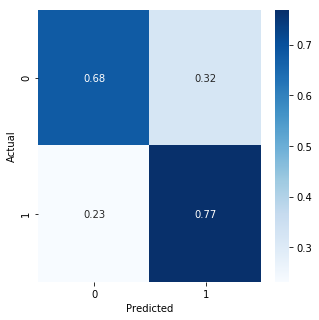

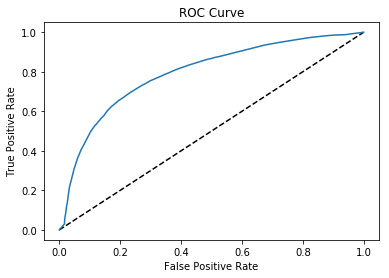

In [10]:
## Training Score
print('\nTraining data set score is {}\n'.format(accuracy_score(clf3.predict(X_train),y_train)))

## Hyperparameter and test score
print("Best max_depth parameter is {}\n".format(best_max_depth))
print('Test data set score is {}\n'.format(accuracy_score(clf3.predict(X_test),y_test)))

## Classification report
print('Classification Report\n')
print(classification_report(y_test,clf3.predict(X_test)))


## Confustion matrix
print('Confusion Matrix\n')
#labels = ['run', 'pass']
confmat = confusion_matrix(y_test, clf3.predict(X_test))
confmat_n = confmat.astype('float')/confmat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confmat_n, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.axhspan    
plt.savefig('Conf_mat_DT.png')

## ROC Curve
y_pred_prob = clf3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob);
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve');
plt.savefig('ROC_DT.png')

## ROC Area

## Random Forest

In [5]:
rf = RandomForestClassifier(random_state = 42)
param_grid = {
            'bootstrap': [True],
            'max_depth': [15, 20, 25],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [2, 4, 6],
            'n_estimators': [1000]
            }
gs = sklearn.model_selection.GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2, cv=5)
gs_results = gs.fit(X_train,y_train.values.ravel())
best_grid = gs_results.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 132 out of 135 | elapsed: 32.7min remaining:   44.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 33.3min finished



Training data set score is 0.823815978671

Best hyperparameters are

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Test data set score is 0.752040739909

Classification Report

             precision    recall  f1-score   support

          0       0.71      0.70      0.70     27890
          1       0.78      0.79      0.79     38875

avg / total       0.75      0.75      0.75     66765

Features sorted by their score:
[(0.2732, 'shotgun'), (0.103, 'cum_run_yards'), (0.0951, 'play_clock'), (0.0884, 'ydstogo'), (0.0824, 'down'), (0.074, 'cum_pass_yards'), (0.0709, 'score_differential'), (0.0614, 'teamQB_dual_threat_rating'), (0.0

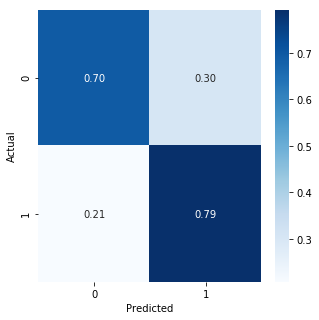

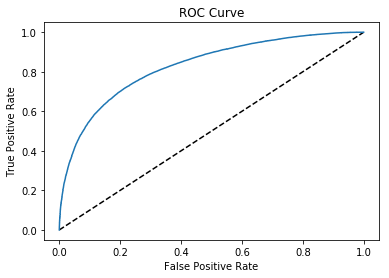

In [7]:
## Training Score
print('\nTraining data set score is {}\n'.format(accuracy_score(best_grid.predict(X_train),y_train)))

## Hyperparameter and test score
print("Best hyperparameters are\n")
print(best_grid)
print('\nTest data set score is {}\n'.format(accuracy_score(best_grid.predict(X_test),y_test)))

## Classification report
print('Classification Report\n')
print(classification_report(y_test,best_grid.predict(X_test)))

## Feature Importance
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), best_grid.feature_importances_), X_train.columns), 
             reverse=True)

## Confustion matrix
print('Confusion Matrix\n')
#labels = ['run', 'pass']
confmat = confusion_matrix(y_test, best_grid.predict(X_test))
confmat_n = confmat.astype('float')/confmat.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confmat_n, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.axhspan  
plt.savefig('Conf_mat_RF.png')

## ROC Curve
y_pred_prob = best_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve');
plt.savefig('ROC_RF.png')